### Assignment 2
###### Create an “Academic performance” dataset of students and perform the following operations using Python.
###### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
###### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
###### 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
###### Reason and document your approach properly.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
dataset=pd.read_csv("D:\SEM - 6\DSBDA\Datasets\StudentsPerformance.csv")
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
dataset.shape

(1000, 8)

In [32]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: xlabel='math score'>

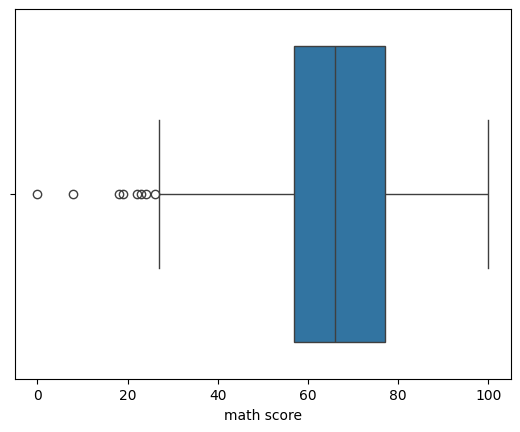

In [34]:
import seaborn as sns
sns.boxplot(x=dataset['math score'])

<Axes: xlabel='reading score'>

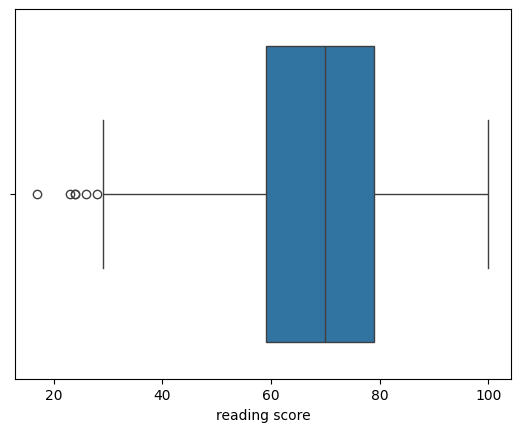

In [35]:
sns.boxplot(x=dataset['reading score'])

<Axes: xlabel='writing score'>

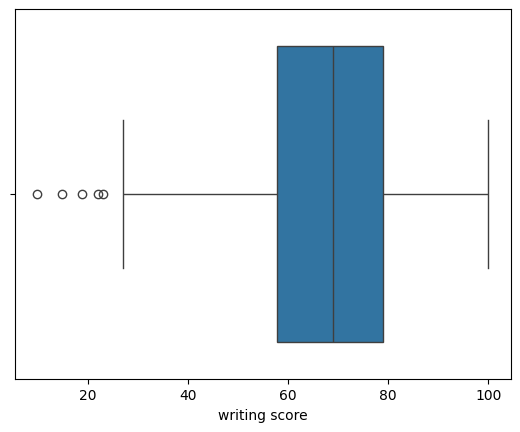

In [36]:
sns.boxplot(x=dataset['writing score'])

[17, 59, 145, 338, 466, 787, 842, 980, 59, 76, 211, 327, 596, 980, 59, 76, 327, 596, 980]


<Axes: xlabel='math score'>

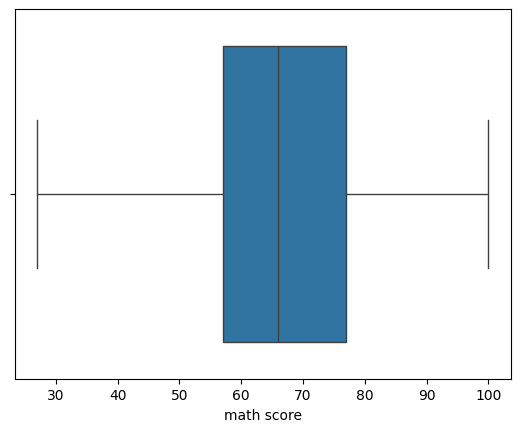

In [37]:
def outliers(df,features):
    q1=dataset[features].quantile(0.25)
    q3=dataset[features].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    ls=dataset.index[(dataset[features]<lower_bound) | (df[features]>upper_bound)]
    return ls

def remove(dataset,ls):
    ls=sorted(set(ls))
    dataset=dataset.drop(ls)
    return dataset

index_list=[]
for features in['math score','reading score','writing score']:
    index_list.extend(outliers(dataset,features))
print(index_list)
dataset1=remove(dataset,index_list)
sns.boxplot(x=dataset1['math score'])

<Axes: xlabel='reading score'>

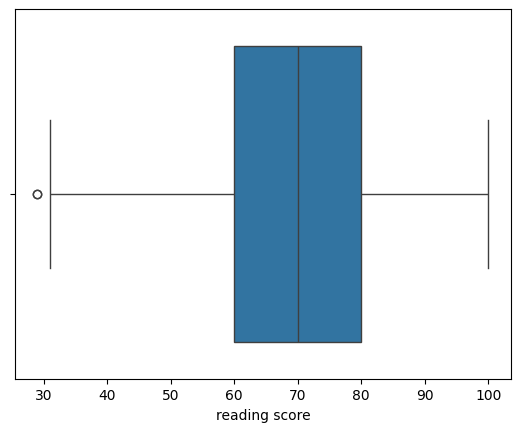

In [38]:
sns.boxplot(x=dataset1['reading score'])

<Axes: xlabel='writing score'>

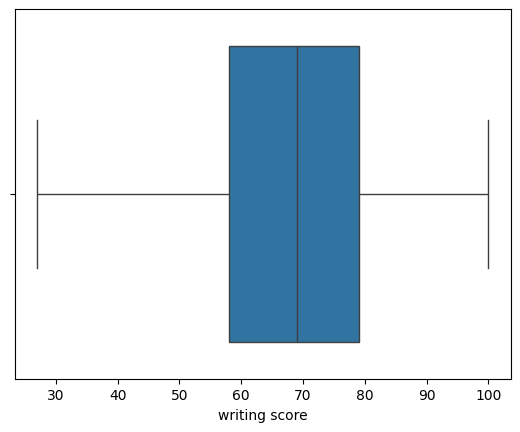

In [39]:
sns.boxplot(x=dataset1['writing score'])